In [137]:
import pandas as pd

In [138]:
df=pd.read_csv("/content/train (2).csv")

In [139]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [140]:
df.head()
#age->cont
#job->cat
#marital->cat
#education_qual->cat
#call_type->cat
#day->cont
#mon->cat
#dur->cont
#num_calls->cont
#prev_outcome->cat
#y->cat

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**Data Cleaning**

In [141]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

AGE


In [142]:
df.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [143]:
df.age.isna().sum()

0

In [144]:
df.age.dtypes

dtype('int64')

In [145]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [146]:
## Outlier detection and correction
q3 = df.age.quantile(0.75)
q1 = df.age.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, upper_threshold, lower_threshold

df.age = df.age.clip(lower_threshold, upper_threshold)

In [147]:
df.age.describe()

count    45211.000000
mean        40.868185
std         10.394895
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

Job

In [148]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [149]:
df.job.isna().sum()

0

In [150]:
df['job'] = df['job'].str.replace('admin.','admin')

<ipython-input-150-27359e408dd6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['job'] = df['job'].str.replace('admin.','admin')


In [151]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin            5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [152]:
df.job.dtypes

dtype('O')

Marital


In [153]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [154]:
df.marital.isna().sum()

0

In [155]:
df.marital.dtypes

dtype('O')

Education Qualification

In [156]:
df.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [157]:
df.education_qual.isna().sum()

0

In [158]:
df.education_qual.dtypes

dtype('O')

Call Type

In [159]:
df.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [160]:
df.call_type.isna().sum()

0

In [161]:
df.call_type.dtypes

dtype('O')

Day

In [162]:
df.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [163]:
df.day.isna().sum()

0

In [164]:
df.day.dtypes

dtype('int64')

Month

In [165]:
df.mon.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [166]:
df.mon.isna().sum()

0

In [167]:
df.mon.dtypes

dtype('O')

Call duration

In [168]:
df.dur.value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [169]:
df.dur.isna().sum()

0

In [170]:
df.dur.dtypes

dtype('int64')

In [171]:
df.dur.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [172]:
## Outlier detection and correction
q3 = df.dur.quantile(0.75)
q1 = df.dur.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, upper_threshold, lower_threshold

df.dur = df.dur.clip(lower_threshold, upper_threshold)

In [173]:
df.dur.describe()

count    45211.000000
mean       234.939307
std        176.749932
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        643.000000
Name: dur, dtype: float64

Number of calls

In [174]:
df.num_calls.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [175]:
df.num_calls.isna().sum()

0

In [176]:
df.num_calls.dtypes

dtype('int64')

In [177]:
df.num_calls.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [178]:
## Outlier detection and correction
q3 = df.num_calls.quantile(0.75)
q1 = df.num_calls.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, upper_threshold, lower_threshold

df.num_calls = df.num_calls.clip(lower_threshold, upper_threshold)

In [179]:
df.num_calls.describe()

count    45211.000000
mean         2.392228
std          1.600111
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

Previous Outcome

In [180]:
df.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [181]:
df.prev_outcome.isna().sum()

0

In [182]:
df.prev_outcome.dtypes

dtype('O')

Duplicates

In [183]:
df=df.drop_duplicates()

In [184]:
df.shape

(45195, 11)

EDA

In [185]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [186]:
df['target'] = df.y.copy()

In [187]:
df.target = df.target.map({'yes':1, 'no':0})

Marital

<Axes: xlabel='marital'>

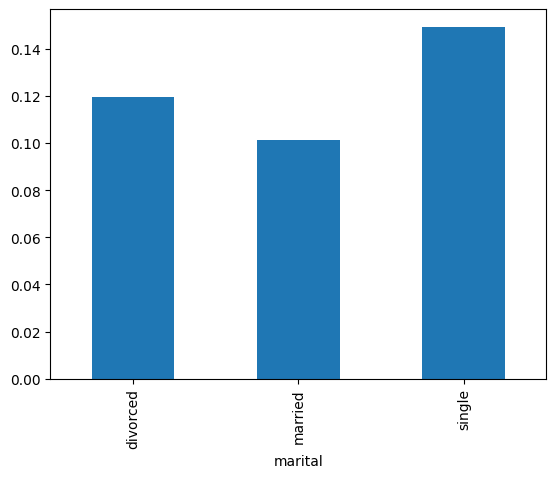

In [188]:
df.groupby('marital')['target'].mean().plot(kind='bar')

Education Qualification

<Axes: xlabel='education_qual'>

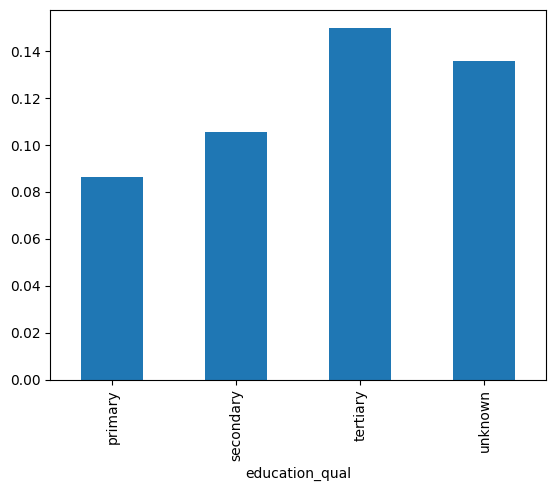

In [189]:
df.groupby('education_qual')['target'].mean().plot(kind='bar')

Call type

<Axes: xlabel='call_type'>

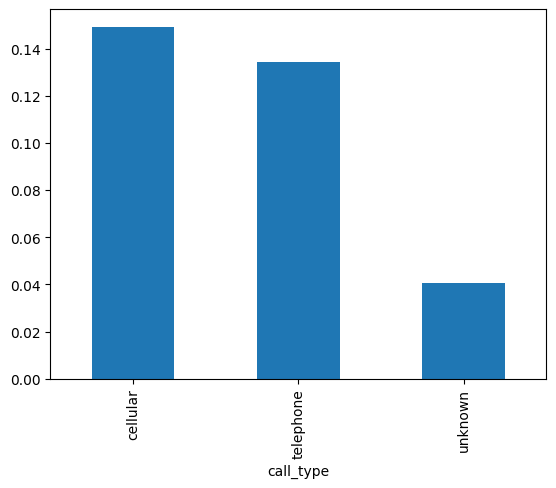

In [190]:
df.groupby('call_type')['target'].mean().plot(kind='bar')

Job

<Axes: xlabel='job'>

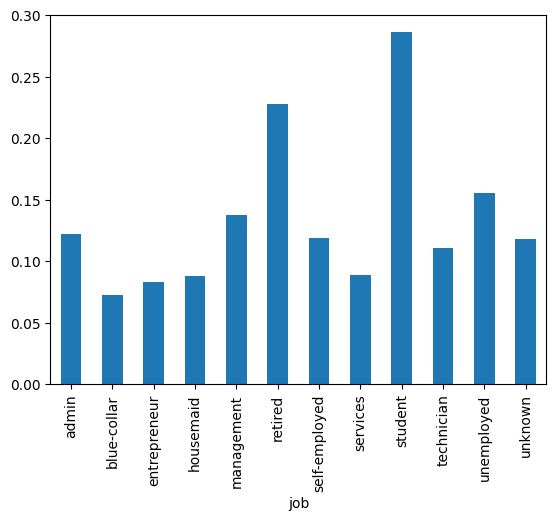

In [191]:
df.groupby('job')['target'].mean().plot(kind='bar')

Month

<Axes: xlabel='mon'>

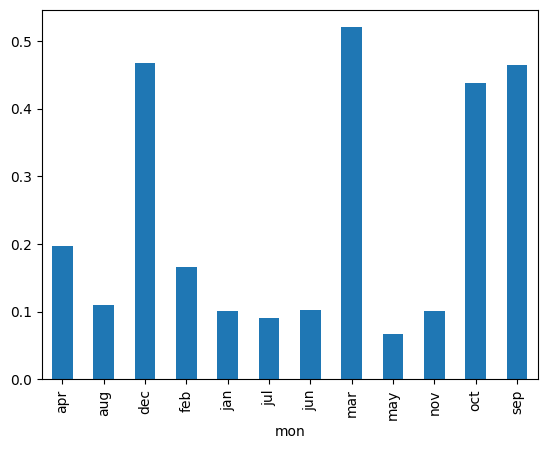

In [192]:
df.groupby('mon')['target'].mean().plot(kind='bar')

Previous Outcome

<Axes: xlabel='prev_outcome'>

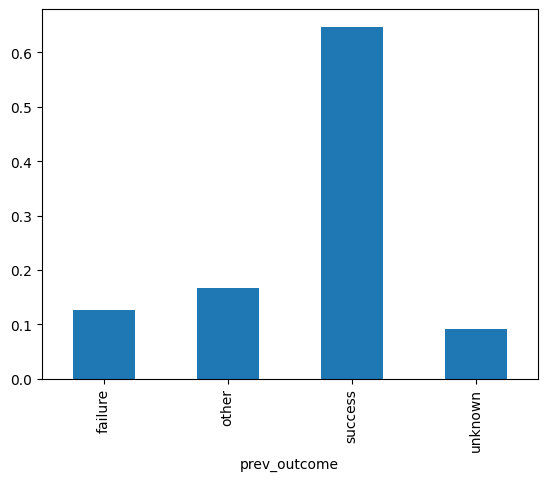

In [193]:
df.groupby('prev_outcome')['target'].mean().plot(kind='bar')

Age

In [194]:
import seaborn as sns

<Axes: xlabel='y', ylabel='age'>

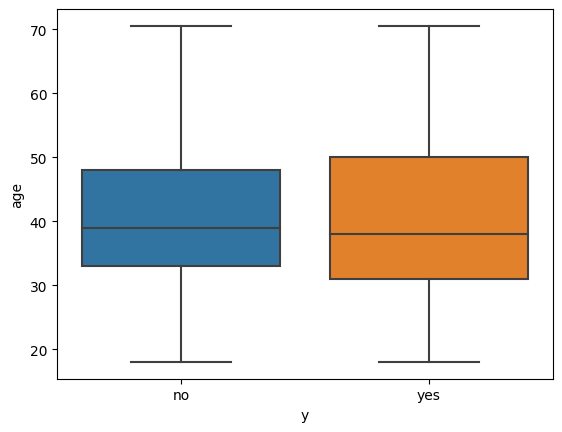

In [195]:
sns.boxplot(x='y',y='age',data=df)

Day

<Axes: xlabel='y', ylabel='day'>

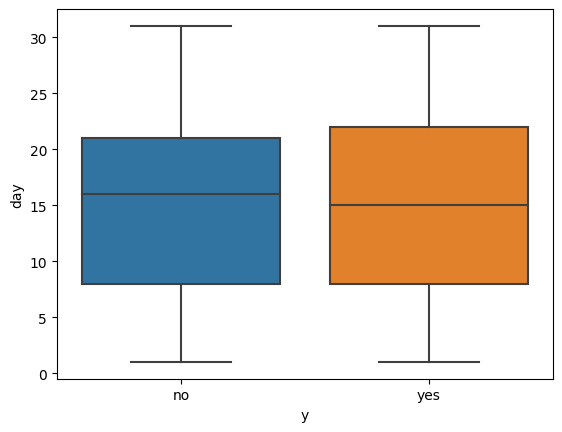

In [196]:
sns.boxplot(x='y',y='day',data=df)

Number of calls

<Axes: xlabel='y', ylabel='num_calls'>

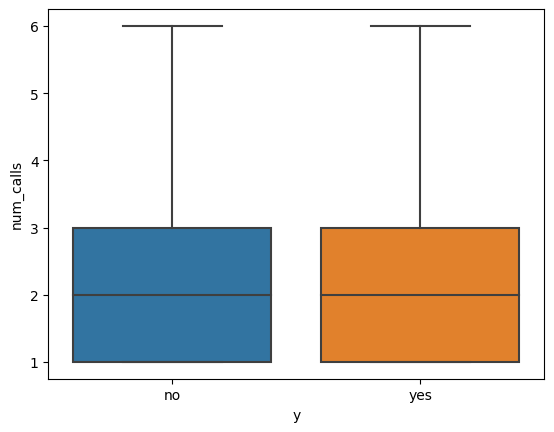

In [197]:
sns.boxplot(x='y',y='num_calls',data=df)

In [198]:
del df['num_calls']  #from eda we can see that number of calls is not an important feature

In [199]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [200]:
del df['y']

Encoding


In [201]:
df.dtypes

age               float64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur                 int64
prev_outcome       object
target              int64
dtype: object

In [202]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,prev_outcome,target
0,58.0,management,married,tertiary,unknown,5,may,261,unknown,0
1,44.0,technician,single,secondary,unknown,5,may,151,unknown,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76,unknown,0
3,47.0,blue-collar,married,unknown,unknown,5,may,92,unknown,0
4,33.0,unknown,single,unknown,unknown,5,may,198,unknown,0


In [203]:
df.groupby('job')['target'].mean().sort_values()

job
blue-collar      0.072780
entrepreneur     0.082717
housemaid        0.087903
services         0.088873
technician       0.110497
unknown          0.118056
self-employed    0.118429
admin            0.122050
management       0.137599
unemployed       0.155027
retired          0.228016
student          0.286019
Name: target, dtype: float64

In [204]:
df.job=df.job.map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin':7,'management':8,'unemployed':9,'retired':10,'student':11})

In [205]:
df.groupby('marital')['target'].mean().sort_values()

marital
married     0.101272
divorced    0.119455
single      0.149406
Name: target, dtype: float64

In [206]:
df.marital=df.marital.map({'married':0,'divorced':1,'single':2})

In [207]:
df.groupby('education_qual')['target'].mean().sort_values()

education_qual
primary      0.086277
secondary    0.105597
unknown      0.135703
tertiary     0.150045
Name: target, dtype: float64

In [208]:
df.education_qual=df.education_qual.map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})

In [209]:
df.groupby('call_type')['target'].mean().sort_values()

call_type
unknown      0.040655
telephone    0.134205
cellular     0.149196
Name: target, dtype: float64

In [210]:
df.call_type=df.call_type.map({'unknown':0,'telephone':1,'cellular':2})

In [211]:
df.groupby('mon')['target'].mean().sort_values()

mon
may    0.067141
jul    0.090975
jan    0.101212
nov    0.101285
jun    0.102305
aug    0.110203
feb    0.166478
apr    0.196794
oct    0.437669
sep    0.464594
dec    0.467290
mar    0.519916
Name: target, dtype: float64

In [212]:
df.mon=df.mon.map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

In [213]:
df.groupby('prev_outcome')['target'].mean().sort_values()

prev_outcome
unknown    0.091601
failure    0.126097
other      0.166848
success    0.647253
Name: target, dtype: float64

In [214]:
df.prev_outcome=df.prev_outcome.map({'unknown':0,'failure':1,'other':2,'success':3})

In [215]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,prev_outcome,target
0,58.0,8,0,3,0,5,0,261,0,0
1,44.0,4,2,1,0,5,0,151,0,0
2,33.0,1,0,1,0,5,0,76,0,0
3,47.0,0,0,2,0,5,0,92,0,0
4,33.0,5,2,2,0,5,0,198,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,3,2,17,3,643,0,1
45207,70.5,10,1,0,2,17,3,456,0,1
45208,70.5,10,0,1,2,17,3,643,3,1
45209,57.0,0,0,1,1,17,3,508,0,0


Split

In [216]:
y=df.target
x=df.drop(columns=['target'])

In [217]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Balanced data or not

In [225]:
y_train.value_counts()/y_train.shape[0]

0    0.884915
1    0.115085
Name: target, dtype: float64

In [219]:
import imblearn#it is a imbalanced data so we have to balance the training data

In [226]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x_train, y_train)


In [227]:
y_smt.value_counts()/y_smt.shape[0]#data is balanced for training data set

1    0.55753
0    0.44247
Name: target, dtype: float64

Scaling

In [228]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_smt)

x_train_scaled = scaler.transform(x_smt)
x_test_scaled = scaler.transform(x_test)

In [229]:
pd.DataFrame(x_train_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,5.480600e+04,5.480600e+04,5.480600e+04,5.480600e+04,5.480600e+04,5.480600e+04,5.480600e+04,54806.000000,5.480600e+04
mean,7.649166e-18,-1.327584e-16,5.185876e-18,1.763198e-17,-9.542011e-17,3.630113e-17,4.148700e-17,0.000000,3.941265e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009,1.000009e+00
min,-2.040806e+00,-1.533391e+00,-7.557825e-01,-1.418113e+00,-1.828537e+00,-1.731992e+00,-1.159276e+00,-1.496974,-5.013844e-01
25%,-8.042899e-01,-6.223857e-01,-7.557825e-01,-4.395905e-01,-5.921262e-01,-8.914950e-01,-1.159276e+00,-0.839089,-5.013844e-01
50%,-1.860316e-01,2.886197e-01,-7.557825e-01,-4.395905e-01,6.442844e-01,-5.099828e-02,-1.078200e-01,-0.291652,-5.013844e-01
75%,6.971946e-01,8.959567e-01,1.586726e+00,5.389318e-01,6.442844e-01,6.694275e-01,5.931509e-01,0.908867,-5.013844e-01
max,2.596131e+00,1.806962e+00,1.586726e+00,1.517454e+00,6.442844e-01,1.870137e+00,2.696064e+00,1.590762,3.189367e+00


ML modelling


Logistic regression

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(x_train_scaled, y_smt)
f'Test data accuracy is : {lr.score(x_test_scaled, y_test)}, {f1_score(y_test, lr.predict(x_test_scaled))} '

'Test data accuracy is : 0.7451045469631596, 0.463936714751047 '

Knn

In [240]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

for k in [1,2,3,4,5,6,7,8,9,10,12,14,15,17,19,20,25,30]:
  knn = KNeighborsClassifier(k)
  knn.fit(x_train_scaled, y_smt)
  train_score = knn.score(x_train_scaled, y_smt)
  knn = KNeighborsClassifier(k)
  cross_val_result = np.mean(cross_val_score(knn, x_train_scaled, y_smt, cv = 10))
  print(f'K : {k}, training score : {train_score} and cross-val score : {cross_val_result}')


KNeighborsClassifier()


K : 1, training score : 1.0 and cross-val score : 0.9464112654598434
K : 2, training score : 0.9837426559135861 and cross-val score : 0.9362118839201647
K : 3, training score : 0.9682334051016313 and cross-val score : 0.9397331424949094
K : 4, training score : 0.9638543225194321 and cross-val score : 0.9364854001281133
K : 5, training score : 0.9550596650001825 and cross-val score : 0.9347154170279012
K : 6, training score : 0.9533810166770061 and cross-val score : 0.9315588655967462
K : 7, training score : 0.9480348866912381 and cross-val score : 0.9304093071353329
K : 8, training score : 0.9465204539648944 and cross-val score : 0.9285846694020616
K : 9, training score : 0.9427434952377477 and cross-val score : 0.927015532756157
K : 10, training score : 0.9404627230595191 and cross-val score : 0.9259754000881613
K : 12, training score : 0.936193117541875 and cross-val score : 0.9227276677094194
K : 14, training score : 0.9327080976535416 and cross-val score : 0.9216145756342081
K : 15

KNeighborsClassifier()

In [233]:
knn = KNeighborsClassifier(1)
knn.fit(x_train_scaled, y_smt)
f'Test data accuracy is : {knn.score(x_test_scaled, y_test)}, {f1_score(y_test, knn.predict(x_test_scaled))} '

'Test data accuracy is : 0.8150237858170152, 0.514235909355026 '

Decison Tree

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,15,20,30]:
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(x_train_scaled, y_smt)
  train_score = dt.score(x_train_scaled, y_smt)
  dt = DecisionTreeClassifier(max_depth = depth)
  cross_val_result = np.mean(cross_val_score(dt, x_train_scaled, y_smt, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.7805349779221253 and cross-val score : 0.7802795223579266
Depth : 2, training score : 0.79713899937963 and cross-val score : 0.7970477875128014
Depth : 3, training score : 0.8534467029157391 and cross-val score : 0.8533918233792385
Depth : 4, training score : 0.8600153267890377 and cross-val score : 0.85901162542932
Depth : 5, training score : 0.8729883589388023 and cross-val score : 0.8735722142983657
Depth : 6, training score : 0.8880232091376856 and cross-val score : 0.8858518445272787
Depth : 7, training score : 0.9056125241761851 and cross-val score : 0.9010508831437601
Depth : 8, training score : 0.9127467795496843 and cross-val score : 0.9080940961276978
Depth : 9, training score : 0.9229828850855746 and cross-val score : 0.9164874110563768
Depth : 10, training score : 0.931485603766011 and cross-val score : 0.920811749148019
Depth : 15, training score : 0.97755720176623 and cross-val score : 0.9440211207395954
Depth : 20, training score : 0.9978287

In [242]:
dt = DecisionTreeClassifier(max_depth = 30)
dt.fit(x_train_scaled, y_smt)
f'Test data accuracy is : {dt.score(x_test_scaled, y_test)}, {f1_score(y_test, dt.predict(x_test_scaled))} '

'Test data accuracy is : 0.8266401150569753, 0.5273001508295626 '

In [250]:
list(zip(x.columns, dt.feature_importances_))

[('age', 0.07604876653855078),
 ('job', 0.043237863889530326),
 ('marital', 0.00905870967295277),
 ('education_qual', 0.01595113355355891),
 ('call_type', 0.08752286207948291),
 ('day', 0.08636622530096676),
 ('mon', 0.15333111566153618),
 ('dur', 0.4863316253792494),
 ('prev_outcome', 0.042151697924171894)]

Voting classifier

In [237]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators = [('logistic_regression', lr),('k-nn', knn),('decision-tree', dt)])
model.fit(x_train_scaled, y_smt)
f'Test data accuracy is : {model.score(x_test_scaled, y_test)}, {f1_score(y_test, model.predict(x_test_scaled))} '

'Test data accuracy is : 0.8141387321606373, 0.5359116022099447 '

Random Forest

In [238]:
from sklearn.ensemble import RandomForestClassifier

for depth in [1,2,3,4,5,6,7,8,9,10,12,15,20]:
  rf = RandomForestClassifier(max_depth = depth)
  rf.fit(x_train_scaled, y_smt)
  train_score = rf.score(x_train_scaled, y_smt)
  cross_val_result = np.mean(cross_val_score(rf, x_train_scaled, y_smt, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.8024668831879721 and cross-val score : 0.8041457516809896
Depth : 2, training score : 0.8571324307557566 and cross-val score : 0.8525340725825246
Depth : 3, training score : 0.8786264277633836 and cross-val score : 0.8666018974639667
Depth : 4, training score : 0.8847936357333138 and cross-val score : 0.8834250736119602
Depth : 5, training score : 0.8914534904937416 and cross-val score : 0.8941902617802443
Depth : 6, training score : 0.9051746159179652 and cross-val score : 0.902620059741882
Depth : 7, training score : 0.9127285333722586 and cross-val score : 0.9117248970231602
Depth : 8, training score : 0.9227091924241871 and cross-val score : 0.9176549446861554
Depth : 9, training score : 0.930098894281648 and cross-val score : 0.9252271083783794
Depth : 10, training score : 0.9393132138816918 and cross-val score : 0.9315951222338084
Depth : 12, training score : 0.9570849906944495 and cross-val score : 0.9436741190869053
Depth : 15, training score : 0.9

In [243]:
rf = RandomForestClassifier(max_depth = 20)
rf.fit(x_train_scaled, y_smt)
f'Test data accuracy is : {rf.score(x_test_scaled, y_test)}, {f1_score(y_test, rf.predict(x_test_scaled))} '

'Test data accuracy is : 0.8356012833278017, 0.5695249130938587 '

In [247]:
list(zip(x.columns, rf.feature_importances_))

[('age', 0.08255299724827544),
 ('job', 0.05203052484418164),
 ('marital', 0.012635505546611107),
 ('education_qual', 0.021259255693928458),
 ('call_type', 0.0628460592573949),
 ('day', 0.08281988740559217),
 ('mon', 0.12716134628813136),
 ('dur', 0.518725633172487),
 ('prev_outcome', 0.039968790543397935)]

Xg boost

In [244]:
import xgboost as xgb

for lr in [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.5, 1]:
  xg = xgb.XGBClassifier(learning_rate=lr)
  xg.fit(x_train_scaled, y_smt)
  train_score = xg.score(x_train_scaled, y_smt)
  cross_val_result = np.mean(cross_val_score(xg, x_train_scaled, y_smt, cv = 10))
  print(f'Learning Rate : {lr}, training score : {train_score} and cross-val score : {cross_val_result}')

Learning Rate : 0.001, training score : 0.8884976097507572 and cross-val score : 0.8891907645123099
Learning Rate : 0.002, training score : 0.9026748896106266 and cross-val score : 0.8958689207707582
Learning Rate : 0.005, training score : 0.9047002153048936 and cross-val score : 0.9017989218228332
Learning Rate : 0.01, training score : 0.913312411049885 and cross-val score : 0.9118891039649911
Learning Rate : 0.02, training score : 0.9215961756012115 and cross-val score : 0.9190780826131946
Learning Rate : 0.03, training score : 0.927434952377477 and cross-val score : 0.9243695706601571
Learning Rate : 0.04, training score : 0.9329088056052257 and cross-val score : 0.929861758669964
Learning Rate : 0.05, training score : 0.939076013575156 and cross-val score : 0.9346058880245893
Learning Rate : 0.06, training score : 0.9439659891252783 and cross-val score : 0.9397512941189005
Learning Rate : 0.07, training score : 0.9487282414334197 and cross-val score : 0.9428532042344024
Learning Ra

In [245]:
xg = xgb.XGBClassifier(learning_rate=0.5)
xg.fit(x_train_scaled, y_smt)
f'Test data accuracy is : {xg.score(x_test_scaled, y_test)}, {f1_score(y_test, xg.predict(x_test_scaled))} '

'Test data accuracy is : 0.8603827857063835, 0.5826719576719577 '

In [246]:
list(zip(x.columns, xg.feature_importances_))#from this we can find out that call_tye is the most important feature followed by dur,mon

[('age', 0.060177587),
 ('job', 0.049285065),
 ('marital', 0.026040858),
 ('education_qual', 0.050865635),
 ('call_type', 0.2978194),
 ('day', 0.04109322),
 ('mon', 0.16823456),
 ('dur', 0.18276459),
 ('prev_outcome', 0.123719126)]